# Aprendizado de máquina supervisionado para classificação

alguem tem que dar informação para ele poder classificar
alguem vai supervisionar enquanto ela aprende
parece o teste de captcha do google
classificar é separar os dados em categorias
manipulamos (organizamos) dados para a máquina aprender
colocamos os dados na máquina
limpamos e separamos os dados (pré-classificamos)
a máquina aprende identificando padrões de forma autonoma com as supervisões

> O machine learning (ML) é a tarefa de receber uma entrada $\mathbf{X}$ e a saida correta $\mathbf{y}$ (supervisão) e tem que  construir uma função $f$ que mapeia $\mathbf{X}$ -> $\mathbf{y}$. No futuro podemos usar $f$ para estimar a resposta de novas entradas $\mathbf{\hat{y}}$

In [3]:
!pip install --quiet matplotlib seaborn pandas scikit-learn

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Blood_samples_dataset_balanced_MODIFICADO.csv")
df.sample(5)

,Unnamed: 0,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
1926,1926,0.887112,0.199039,0.102082,1.175561,0.911390,0.261193,0.823807,0.871850,0.995610,...,0.673479,0.136788,0.340867,0.830748,1.001059,0.618348,0.767283,0.738296,0.487677,Diabetes
125,125,0.472397,0.277444,1.001516,0.274196,0.840452,0.342322,0.812705,0.935936,0.969438,...,0.047255,0.608511,0.968349,0.223321,0.619569,0.691438,0.387264,0.386025,0.587180,Anemia
1661,1661,0.526771,0.869374,0.808330,1.031514,0.082300,0.497824,0.877085,0.622657,0.433962,...,0.246029,0.311040,0.769079,0.287273,0.554171,0.441316,0.648890,0.547585,0.373964,Anemia
1507,1507,0.904340,0.370032,0.571413,0.350017,0.553176,0.757617,1.045185,0.833776,0.252078,...,0.042559,0.083750,0.803650,0.954130,0.605838,0.868879,0.444346,0.785364,0.050634,Thalasse
1028,1028,0.202102,0.415498,0.818257,0.902836,1.034274,0.380577,0.919550,0.517725,0.842274,...,0.540107,0.680494,0.460580,0.383809,0.891695,1.057502,0.579676,0.291167,0.457602,Healthy


In [5]:
df = df.drop("Unnamed: 0", axis=1)
df.sample(5)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
881,0.406741,0.659170,1.045875,0.317398,0.626378,0.626120,0.807724,0.479317,0.993203,1.026923,...,0.965755,0.474299,0.714224,0.536516,0.536382,0.449374,0.690539,0.405247,0.545415,Thalasse
2170,0.413804,0.516818,0.769644,1.138312,0.485975,0.910337,0.337362,0.443936,0.914604,0.256822,...,0.464976,0.320896,0.680152,0.519946,0.644865,0.681362,0.350384,0.349118,0.431935,Anemia
1998,0.677822,0.938037,0.828574,1.198716,0.286839,0.799516,1.000587,0.144953,0.180454,0.142051,...,0.462722,0.596098,0.945139,1.000101,0.410402,0.387937,0.697667,0.877068,0.572591,Healthy
1576,1.035503,0.651395,1.122021,0.967412,0.588004,0.537252,0.320352,0.618184,0.548635,0.788592,...,0.368185,0.519783,0.339415,0.448400,0.344766,0.615752,0.328403,0.721508,0.780125,Anemia
935,0.240825,0.119623,0.997126,1.021311,0.178963,1.069714,0.047551,0.860495,1.011225,1.201936,...,0.805583,0.679110,0.575965,0.272739,0.569525,0.847205,0.404954,0.334541,0.660079,Anemia


Glucose


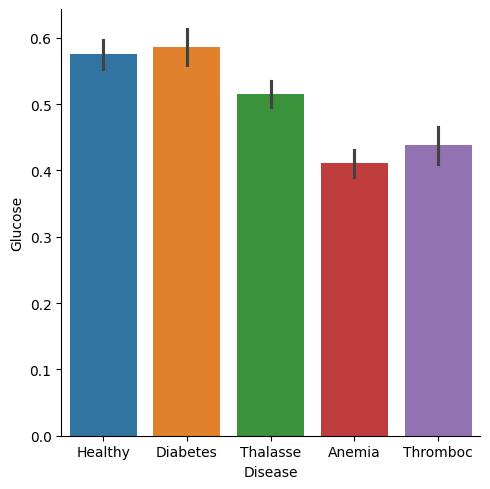

Cholesterol


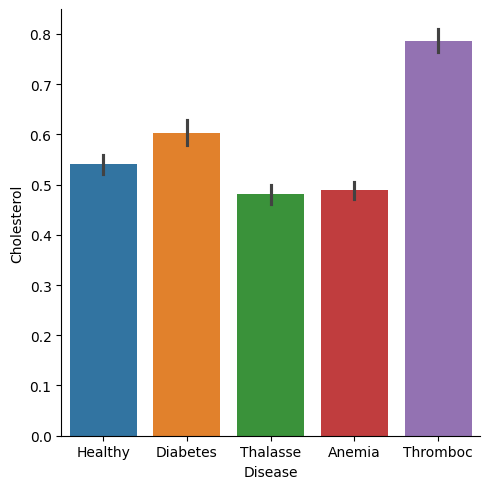

Hemoglobin


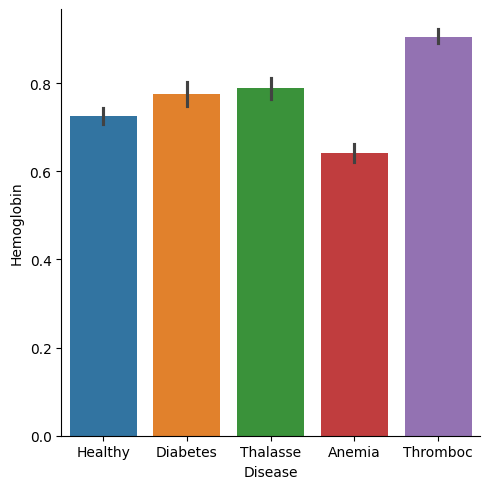

Platelets


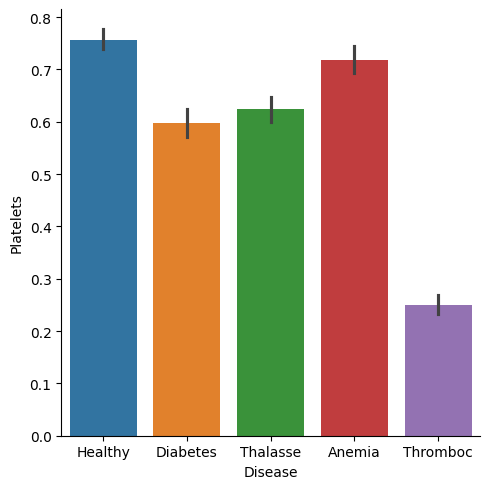

White Blood Cells


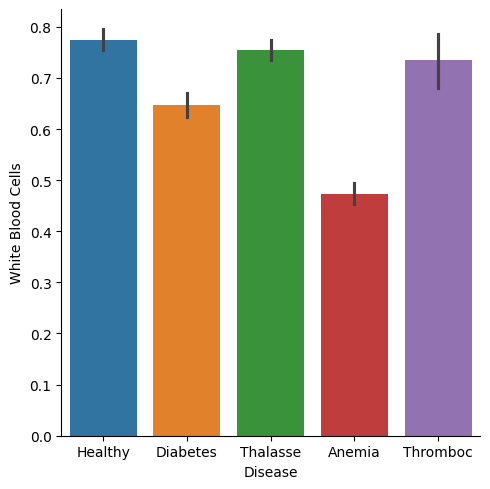

Red Blood Cells


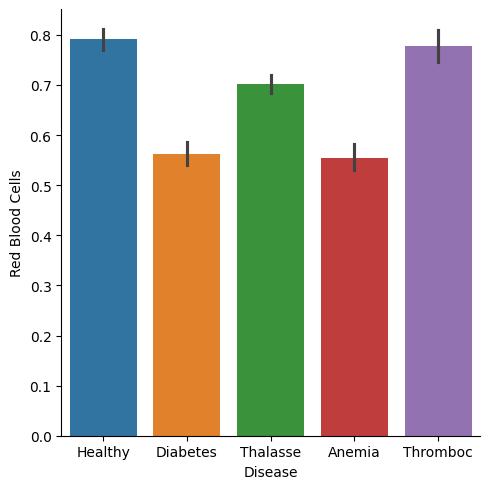

Hematocrit


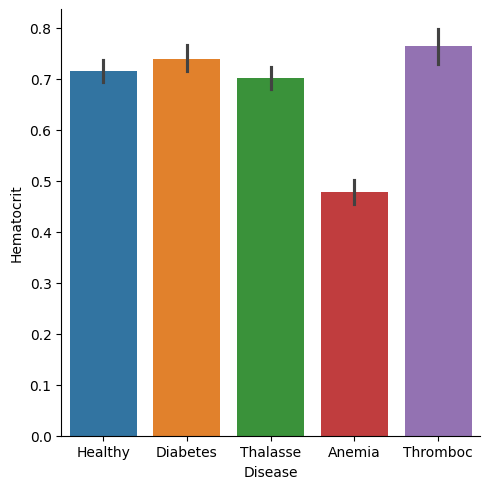

Mean Corpuscular Volume


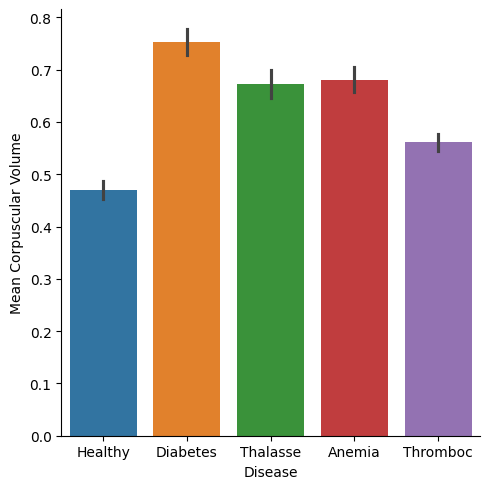

Mean Corpuscular Hemoglobin


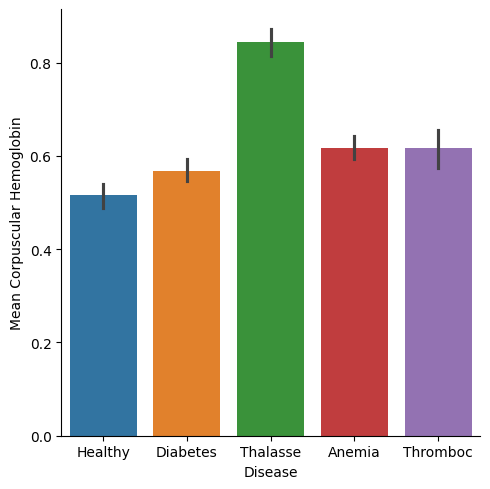

Mean Corpuscular Hemoglobin Concentration


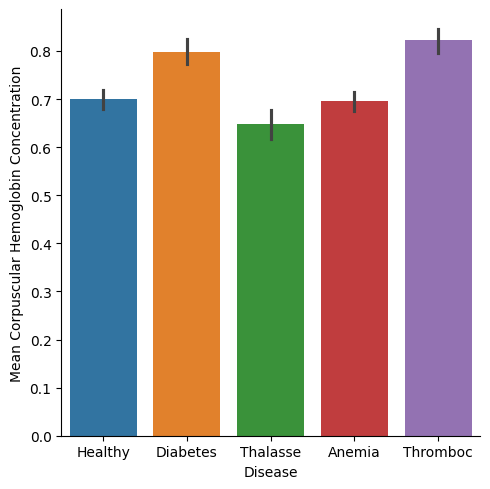

Insulin


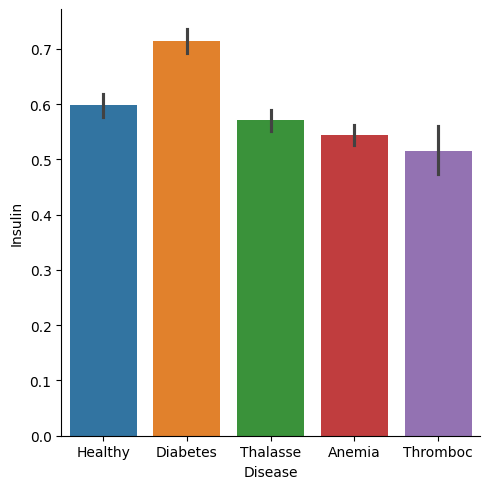

BMI


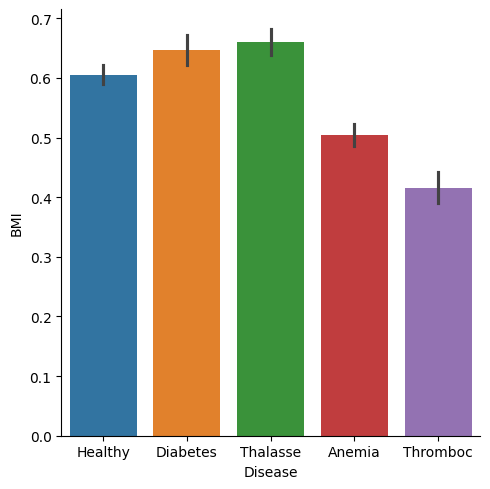

Systolic Blood Pressure


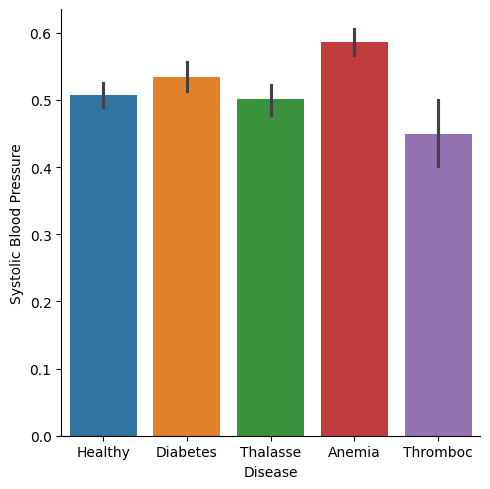

Diastolic Blood Pressure


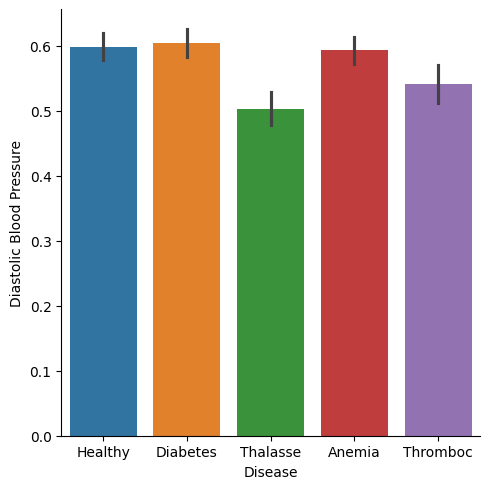

Triglycerides


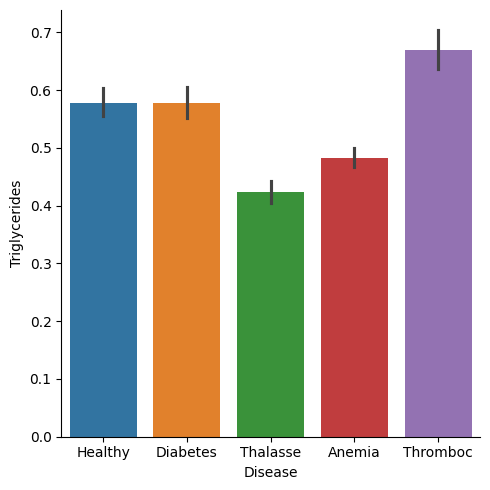

HbA1c


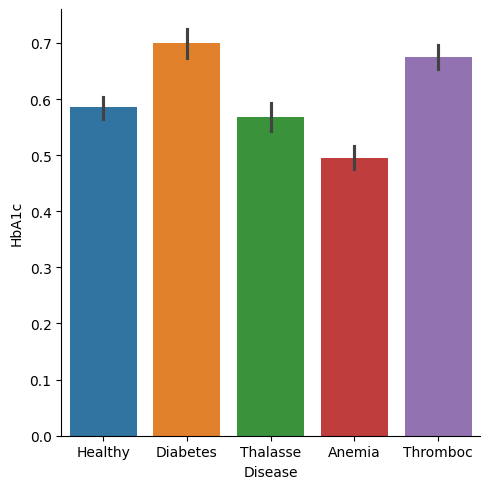

LDL Cholesterol


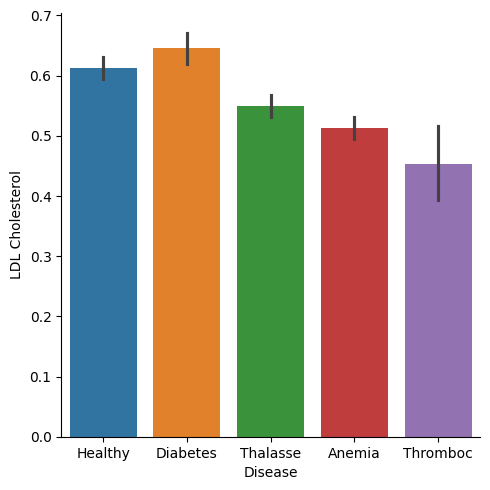

HDL Cholesterol


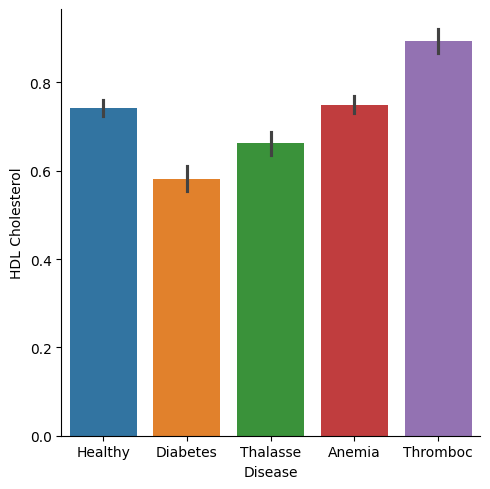

ALT


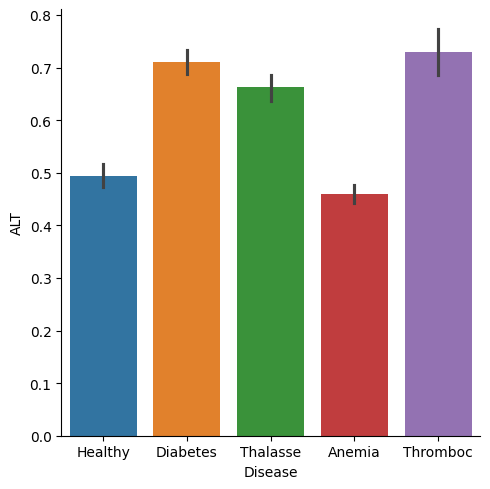

AST


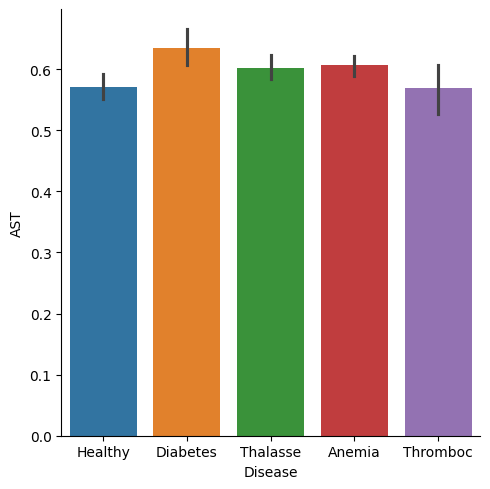

Heart Rate


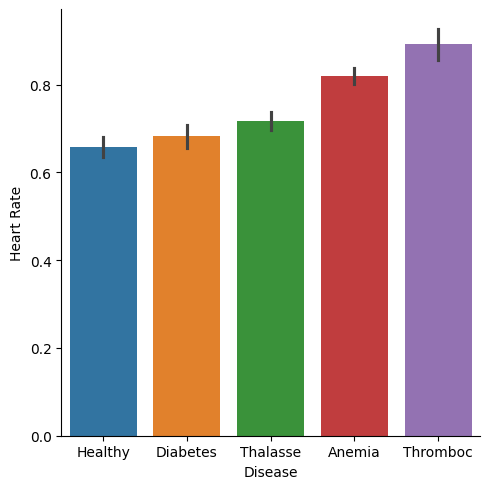

Creatinine


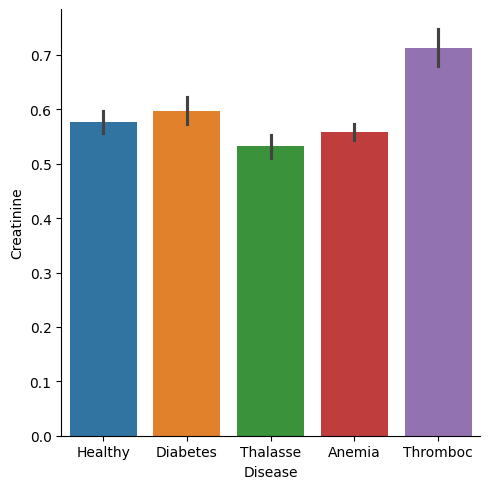

Troponin


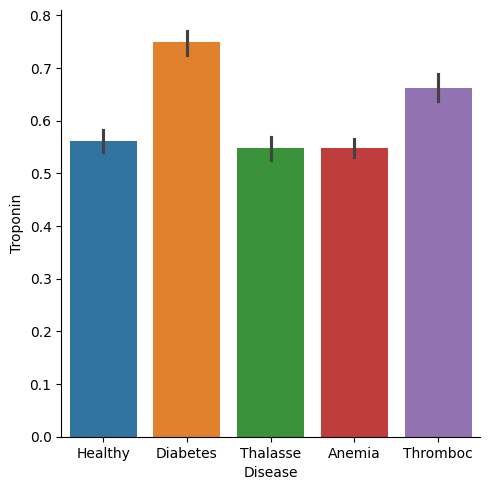

C-reactive Protein


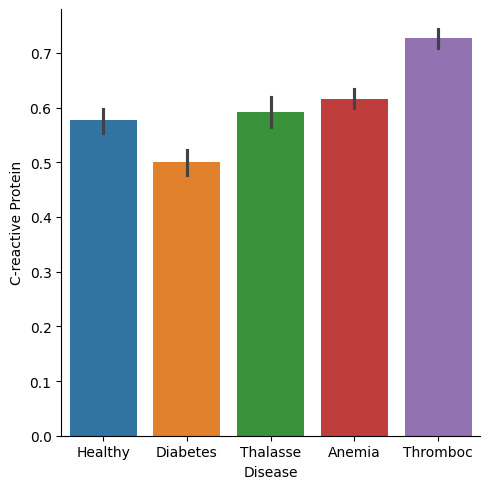

Disease


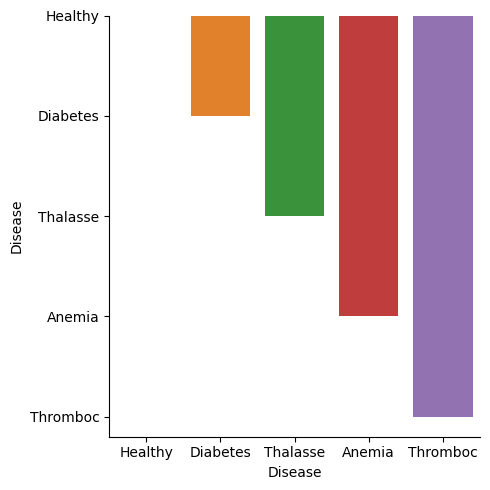

In [9]:
#sh*t in, sht*out
#data literacy

for coluna in df.columns:
    print(coluna)
    sns.catplot(data=df, x="Disease", y=coluna, kind="bar", hue="Disease")
    plt.show()

In [10]:
X = df.drop("Disease", axis=1)
y = df["Disease"]

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [12]:
deyckson = DecisionTreeClassifier()
deyckson.fit(X,y)

DecisionTreeClassifier()

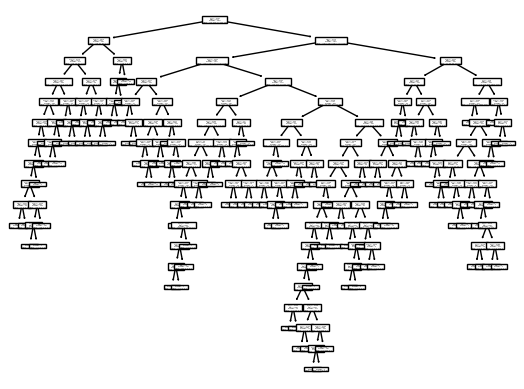

In [13]:
plot_tree(deyckson);

In [22]:
pac_aleatorio = X.sample(3, random_state=42)
pac_aleatorio

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
2236,0.166203,0.715004,0.718211,1.038445,0.791181,0.818299,0.262325,1.033515,0.396963,0.057835,...,0.388513,0.747181,0.177936,1.113619,0.617529,0.866632,0.654956,0.366683,0.819282,0.352590
668,0.563720,0.468631,0.390634,0.580349,1.159950,0.299237,0.985401,0.344824,0.278967,0.844606,...,1.049622,0.530250,0.863418,0.548694,0.389320,0.300619,0.473365,0.710559,0.739672,1.029516
2005,0.576591,0.864063,0.571008,1.153372,0.526875,0.653220,0.942053,1.041122,0.210588,1.227110,...,0.357224,1.025883,0.334834,0.465389,0.637683,0.883233,0.322640,0.412150,1.088099,0.557686


In [17]:
y.iloc[2236]

'Anemia'

In [23]:
deyckson.predict(pac_aleatorio)

array(['Anemia', 'Healthy', 'Diabetes'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score

y_pred = deyckson.predict(X)

accuracy_score(y,y_pred)

1.0

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [27]:
deycksonv2 = DecisionTreeClassifier()
deycksonv2.fit(X_train, y_train)
deycksonv2

DecisionTreeClassifier()

In [31]:
print(accuracy_score(y_train, deycksonv2.predict(X_train)))
print(accuracy_score(y_test, deycksonv2.predict(X_test)))

1.0
0.9188144329896907
